In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [6]:
pip install pmdarima


Note: you may need to restart the kernel to use updated packages.


In [7]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

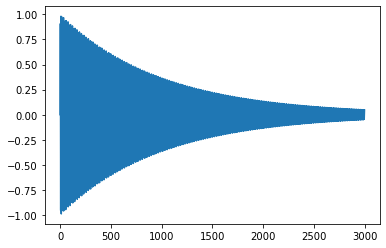

In [86]:
gdf01 = pd.DataFrame(columns = ['Timestamp', 'Signal'])
fdf01 = pd.DataFrame(columns = ['Timestamp', 'Signal'])
hdf01 = pd.DataFrame(columns = ['Timestamp', 'Signal'])
jdf01 = pd.DataFrame(columns = ['Timestamp', 'Signal'])
df01 = pd.DataFrame(columns = ['Timestamp', 'Signal'])
for t in range(3000):
    #y = math.sin(math.radians(10*t)) * np.exp(-0.1*t)
    y = np.sin(10*0.1*t) * np.exp(-0.01*0.1*t)
    #z = math.sin(math.radians(8*t)) * np.exp(-0.2*t)
    z = np.sin(8*0.2*t) * np.exp(-0.014*0.2*t)
    r = np.sin(6*0.2*t) * np.exp(-0.021*0.2*t)
    p = np.sin(4*0.2*t) * np.exp(-0.028*0.2*t)
    x = y + z
    k = y + z + r
    q = y + z + r + p
    gdf01 = gdf01.append({'Timestamp':t, 'Signal':y}, ignore_index = True)
    fdf01 = fdf01.append({'Timestamp':t, 'Signal':z}, ignore_index = True)
    hdf01 = hdf01.append({'Timestamp':t, 'Signal':x}, ignore_index = True)
    jdf01 = jdf01.append({'Timestamp':t, 'Signal':k}, ignore_index = True)
    
    df01 =  df01.append({'Timestamp':t, 'Signal':y}, ignore_index = True)


df01['Signal'].plot()
df01.to_csv("df.csv")


In [ ]:
#To create oversampled data with one pole

In [17]:
#To check dataframe with one pole i.e. gdf
#with below step we get (1,0,1)
#stepwise_fit = auto_arima(df01['Signal'], trace = True,suppress_warnings=True)   
#With below step we get (1,0,0)
#stepwise_fit = auto_arima(df01['Signal'], trace = True,suppress_warnings=True, seasonal=False)
#With below step we get (1,0,0)
#stepwise_fit = auto_arima(df01['Signal'], trace = True,suppress_warnings=True, seasonal=False, D=1)
#With below we get (1,0,0)
#stepwise_fit = auto_arima(df01['Signal'], trace = True,suppress_warnings=True, seasonal=False, D=1, stepwise = False)

#with below we get, (1,0,0)
stepwise_fit = auto_arima(df01['Signal'], trace = True,suppress_warnings=True,approximation = False, seasonal=False, D=1, stepwise = False,allowmean=False, allowdrift=False) 
stepwise_fit.summary()

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-2387.667, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.66 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=1.46 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=2.83 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=inf, Time=2.98 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=inf, Time=3.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-2670.665, Time=0.32 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=1.10 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=2.90 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=3.67 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=inf, Time=4.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=2.83 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=2.86 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=2.28 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=2.24 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=1.35 sec
 ARIMA(3,0,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1500
Model:               SARIMAX(1, 0, 0)   Log Likelihood                1337.332
Date:                Tue, 16 Nov 2021   AIC                          -2670.665
Time:                        11:24:29   BIC                          -2660.038
Sample:                             0   HQIC                         -2666.706
                               - 1500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4161      0.007    -56.595      0.000      -0.431      -0.402
sigma2         0.0098   9.12e-05    107.958      0.000       0.010       0.010
===================================================================================
Ljung-Box (L1) (Q):                 246.08   Jarque-Bera (JB):             52856.07
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                             0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                        32.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Shape of data (1801, 3)


<AxesSubplot:>

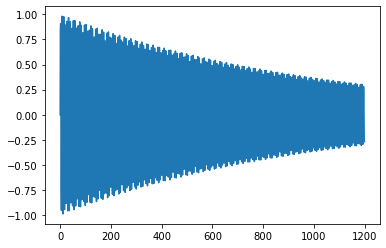

In [87]:

train_df01=pd.read_csv('/Users/shravankumarakula/Documents/pythonWorkspace/Time Signals/syntheticData/df.csv',parse_dates=['Timestamp'],  nrows=1200)

test_df01=pd.read_csv('/Users/shravankumarakula/Documents/pythonWorkspace/Time Signals/syntheticData/df.csv',parse_dates=['Timestamp'], skiprows=range(1,1200))


print('Shape of data',test_df01.shape)


train_df01.to_csv('train01df.csv')
test_df01.to_csv('test01df.csv')
train_df01['Signal'].plot()

In [88]:

stepwise_fit = auto_arima(train_df01['Signal'],trace = True,suppress_warnings=True,approximation = True, seasonal=False, stepwise = False,allowmean=False, allowdrift=False) 

stepwise_fit.summary()



 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1411.004, Time=0.24 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=1.03 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=1.53 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=2.33 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=inf, Time=1.15 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=inf, Time=1.42 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=998.974, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.78 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=1.28 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=1.80 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=inf, Time=1.61 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.66 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-12128.051, Time=1.11 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-12126.052, Time=1.17 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=2.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=1.75 sec
 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1200
Model:               SARIMAX(4, 0, 1)   Log Likelihood                6350.453
Date:                Tue, 16 Nov 2021   AIC                         -12688.906
Time:                        12:31:39   BIC                         -12658.366
Sample:                             0   HQIC                        -12677.402
                               - 1200                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6118      0.043    -14.281      0.000      -0.696      -0.528
ar.L2          0.0349      0.156      0.224      0.822      -0.270       0.340
ar.L3         -0.8344      0.174     -4.794      0.000      -1.176      -0.493
ar.L4         -0.7939      0.196     -4.042      0.000      -1.179      -0.409
ma.L1          0.9002      0.109      8.279      0.000       0.687       1.113
sigma2      1.446e-06   1.15e-07     12.578      0.000    1.22e-06    1.67e-06
===================================================================================
Ljung-Box (L1) (Q):                 272.14   Jarque-Bera (JB):             10554.94
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.17   Skew:                             1.31
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.19e+17. Standard errors may be unstable.
"""

In [79]:
stepwise_fit = auto_arima(train_df01['Signal'],d=1,trace = True,suppress_warnings=True,approximation = True, seasonal=False, stepwise = False,allowmean=False, allowdrift=False) 

stepwise_fit.summary()

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1331.804, Time=0.29 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.57 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=4.61 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.67 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=2.76 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=3.61 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1218.998, Time=0.65 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.41 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.03 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.03 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=1.64 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.87 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.85 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.23 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=inf, Time=1.61 sec
 ARIMA(3,1,1)(

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:               SARIMAX(3, 1, 1)   Log Likelihood                2677.974
Date:                Tue, 16 Nov 2021   AIC                          -5343.947
Time:                        12:12:21   BIC                          -5317.576
Sample:                             0   HQIC                         -5333.681
                                - 600                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -4.522e-06   2.44e-05     -0.185      0.853   -5.24e-05    4.33e-05
ar.L1          0.1567      0.055      2.836      0.005       0.048       0.265
ar.L2         -0.1769      0.046     -3.840      0.000      -0.267      -0.087
ar.L3          0.9889      0.055     17.889      0.000       0.881       1.097
ma.L1         -0.9812      0.093    -10.526      0.000      -1.164      -0.799
sigma2      7.284e-06   6.21e-07     11.731      0.000    6.07e-06     8.5e-06
===================================================================================
Ljung-Box (L1) (Q):                 107.02   Jarque-Bera (JB):                 4.76
Prob(Q):                              0.00   Prob(JB):                         0.09
Heteroskedasticity (H):               0.19   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [89]:
stepwise_fit = auto_arima(train_df01['Signal'], start_p=0, start_q=0,max_d = 2,
                          max_p=5, max_q=5,m=12,start_P=0,start_Q=0,
                          max_P = 2, max_Q = 2,
                          seasonal=True,
                          d=1,D=1,trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-90.107, Time=0.31 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-1956.967, Time=1.57 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=8.03 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-498.242, Time=0.56 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=inf, Time=3.87 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=11.86 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=2.13 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=16.58 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-1548.548, Time=1.07 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=inf, Time=14.24 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=inf, Time=5.33 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=inf, Time=4.10 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=7713363.708, Time=4.68 sec
 ARIMA(1,1,0)(1,1,0)[12] intercept   : AIC=-1954.974, Time=2.86 sec

Best model:  ARIMA(1,1,0)(1,1,0)[12]          
Tot

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1200
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                 981.484
Date:                            Tue, 16 Nov 2021   AIC                          -1956.967
Time:                                    12:34:53   BIC                          -1941.730
Sample:                                         0   HQIC                         -1951.224
                                           - 1200                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5414      0.062      8.738      0.000       0.420       0.663
ar.S.L12       0.8458      0.036     23.512      0.000       0.775       0.916
sigma2         0.0111      0.001     18.212      0.000       0.010       0.012
===================================================================================
Ljung-Box (L1) (Q):                 348.66   Jarque-Bera (JB):                35.62
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.21   Skew:                            -0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [90]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train_df01['Signal'],order=(1,1,0))
model=model.fit()
model.summary()

#Model predicts (2,0,0) without pqd and (2,1,1) with pqd but with 2,1,0 we get correct

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Signal   No. Observations:                 1200
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -447.780
Date:                Tue, 16 Nov 2021   AIC                            899.560
Time:                        12:36:38   BIC                            909.738
Sample:                             0   HQIC                           903.394
                               - 1200                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5400      0.029     18.850      0.000       0.484       0.596
sigma2         0.1235      0.007     18.635      0.000       0.111       0.137
===================================================================================
Ljung-Box (L1) (Q):                 346.65   Jarque-Bera (JB):                35.38
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.20   Skew:                             0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

1200 3000


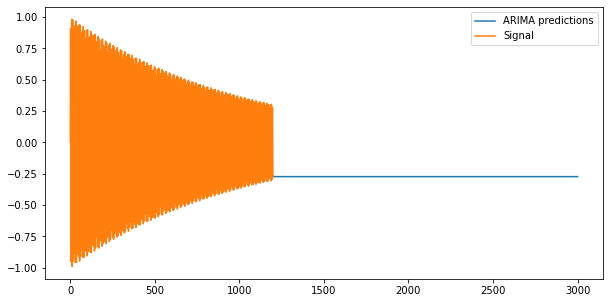

In [91]:
start=len(train_df01)
end=len(train_df01)+len(test_df01)-1
print(start, end)


pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')

pred.plot(legend=True, figsize=(12,8))
#test['Frequency'].plot(legend=True)
train_df01['Signal'].plot(legend=True, figsize=(10,5))





pred.to_csv('pred01df.csv')

['#Observations', 'ARIMA predictions', 'Actual_signal']


<AxesSubplot:xlabel='#Observations'>

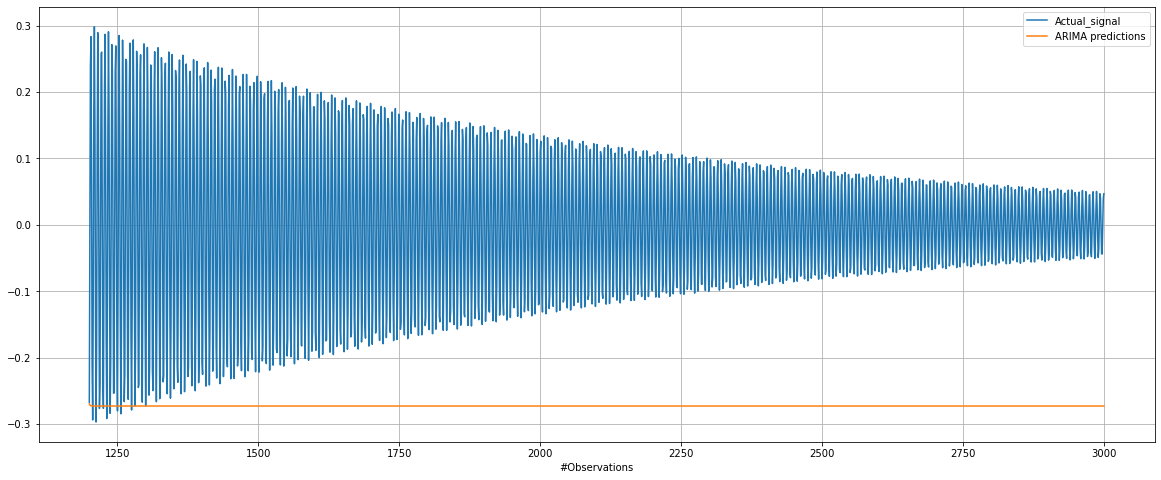

In [92]:
data1_01 = pd.read_csv('pred01df.csv',sep=',',parse_dates=False)
data2_01 = pd.read_csv('test01df.csv',sep=',',parse_dates=False)
data1_01['Actual_signal'] = data2_01['Signal']


#print(pred.head(), test_df.head())

#data1.plot(legend=True)
#data1.plot(x='ARIMA predictions', y='Actual_Frequency')


data1_01 = data1_01.rename(columns={"Unnamed: 0":"#Observations"})
mylist=list(data1_01)
print(mylist)
data1_01.to_csv('output01df.csv')
data1_01.plot(x='#Observations', y=['Actual_signal','ARIMA predictions'], figsize=(20,8), grid=True)

In [ ]:
#To create oversampled data with 2 poles

In [106]:

stepwise_fit = auto_arima(df01['Signal'], trace = True,suppress_warnings=True)           

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.90 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=303.318, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=292.101, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=301.324, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-3426.538, Time=0.57 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-3644.942, Time=0.90 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=2.27 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.32 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.36 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-8629.382, Time=3.46 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-13782.772, Time=3.49 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=3.17 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.68 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.97 sec
 ARIM

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1500
Model:               SARIMAX(5, 0, 1)   Log Likelihood                6899.386
Date:                Mon, 15 Nov 2021   AIC                         -13782.772
Time:                        22:04:04   BIC                         -13740.266
Sample:                             0   HQIC                        -13766.937
                               - 1500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -4.039e-06   1.22e-05     -0.330      0.741    -2.8e-05    1.99e-05
ar.L1          0.0959      0.035      2.709      0.007       0.027       0.165
ar.L2         -1.1683      0.032    -36.504      0.000      -1.231      -1.106
ar.L3          1.1315      0.073     15.527      0.000       0.989       1.274
ar.L4         -0.1195      0.032     -3.727      0.000      -0.182      -0.057
ar.L5          0.9874      0.036     27.684      0.000       0.917       1.057
ma.L1         -0.9716      0.066    -14.663      0.000      -1.102      -0.842
sigma2        5.7e-06   2.12e-07     26.930      0.000    5.29e-06    6.11e-06
===================================================================================
Ljung-Box (L1) (Q):                 181.49   Jarque-Bera (JB):             36219.93
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                             0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [107]:

train_df01=pd.read_csv('/Users/shravankumarakula/Documents/pythonWorkspace/Time Signals/syntheticData/df.csv',parse_dates=['Timestamp'], skiprows=range(1,400), nrows=600)

test_df01=pd.read_csv('/Users/shravankumarakula/Documents/pythonWorkspace/Time Signals/syntheticData/df.csv',parse_dates=['Timestamp'], skiprows=range(1,1000))


print('Shape of data',test_df01.shape)


train_df01.to_csv('train01df.csv')
test_df01.to_csv('test01df.csv')

Shape of data (501, 3)


In [48]:
stepwise_fit = auto_arima(train_df01['Signal'], trace = True,suppress_warnings=False)           

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-6096.874, Time=0.67 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-797.085, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-795.506, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-799.080, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.99 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-6229.154, Time=0.71 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-6185.229, Time=0.66 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=1.06 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-7102.446, Time=2.01 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.62 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.46 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.96 sec
 AR

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:               SARIMAX(4, 0, 1)   Log Likelihood                4026.484
Date:                Mon, 15 Nov 2021   AIC                          -8038.968
Time:                        21:36:36   BIC                          -8008.189
Sample:                             0   HQIC                         -8026.986
                                - 600                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -2.388e-06    6.2e-06     -0.385      0.700   -1.45e-05    9.76e-06
ar.L1         -0.2560      0.008    -33.476      0.000      -0.271      -0.241
ar.L2         -1.9783      0.005   -420.284      0.000      -1.988      -1.969
ar.L3         -0.2532      0.008    -32.115      0.000      -0.269      -0.238
ar.L4         -0.9670      0.004   -224.401      0.000      -0.975      -0.959
ma.L1         -0.6230   1.25e-05     -5e+04      0.000      -0.623      -0.623
sigma2      8.447e-08   3.03e-09     27.908      0.000    7.85e-08    9.04e-08
===================================================================================
Ljung-Box (L1) (Q):                   0.51   Jarque-Bera (JB):             29680.62
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                            -3.39
Prob(H) (two-sided):                  0.00   Kurtosis:                        36.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.78e+21. Standard errors may be unstable.
"""

In [118]:
stepwise_fit = auto_arima(df01['Signal'], start_p=0, start_q=0,max_d = 2,
                          max_p=5, max_q=5,m=12,start_P=0,start_Q=0,
                          max_P = 2, max_Q = 2,
                          seasonal=True,
                          d=1,D=1,trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-323.925, Time=0.13 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-1127.993, Time=0.93 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=3.76 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-461.214, Time=0.21 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=inf, Time=3.84 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=3.86 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=2.20 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=8.03 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-913.096, Time=0.50 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=inf, Time=3.10 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=inf, Time=4.32 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=inf, Time=2.89 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=inf, Time=2.50 sec
 ARIMA(1,1,0)(1,1,0)[12] intercept   : AIC=-1126.003, Time=2.05 sec

Best model:  ARIMA(1,1,0)(1,1,0)[12]          
Total fit time

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1500
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                 566.997
Date:                            Mon, 15 Nov 2021   AIC                          -1127.993
Time:                                    22:06:52   BIC                          -1112.080
Sample:                                         0   HQIC                         -1122.062
                                           - 1500                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3745      0.009    -40.726      0.000      -0.393      -0.356
ar.S.L12       0.6686      0.006    105.275      0.000       0.656       0.681
sigma2         0.0272      0.000    102.120      0.000       0.027       0.028
===================================================================================
Ljung-Box (L1) (Q):                 179.64   Jarque-Bera (JB):             42377.93
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [120]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train_df01['Signal'],order=(4,0,1))
model=model.fit()
model.summary()

#model predicts to be (4,0,1) without pqd which is close and (1,1,0) with pqd which is not correct

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Signal   No. Observations:                  600
Model:                 ARIMA(4, 0, 1)   Log Likelihood                2927.920
Date:                Mon, 15 Nov 2021   AIC                          -5841.841
Time:                        22:07:42   BIC                          -5811.062
Sample:                             0   HQIC                         -5829.859
                                - 600                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.468e-05      0.000     -0.067      0.946      -0.000       0.000
ar.L1          0.1186      0.055      2.153      0.031       0.011       0.227
ar.L2         -0.7351      0.085     -8.685      0.000      -0.901      -0.569
ar.L3          0.1904      0.058      3.295      0.001       0.077       0.304
ar.L4          0.2477      0.083      2.986      0.003       0.085       0.410
ma.L1          0.2651      0.098      2.707      0.007       0.073       0.457
sigma2       3.34e-06   2.75e-07     12.141      0.000     2.8e-06    3.88e-06
===================================================================================
Ljung-Box (L1) (Q):                  78.61   Jarque-Bera (JB):           1388768.41
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                           -14.19
Prob(H) (two-sided):                  0.00   Kurtosis:                       236.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.2e+17. Standard errors may be unstable.
"""

600 1100


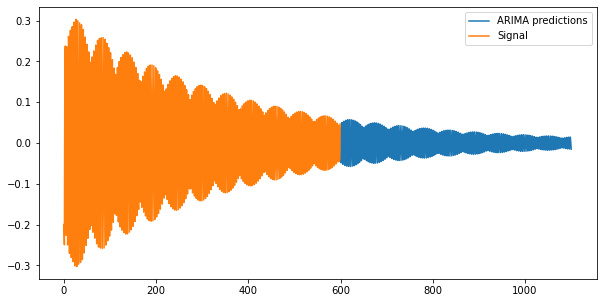

In [121]:
start=len(train_df01)
end=len(train_df01)+len(test_df01)-1
print(start, end)


pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')

pred.plot(legend=True, figsize=(12,8))
#test['Frequency'].plot(legend=True)
train_df01['Signal'].plot(legend=True, figsize=(10,5))





pred.to_csv('pred01df.csv')

['#Observations', 'ARIMA predictions', 'Actual_signal']


<AxesSubplot:xlabel='#Observations'>

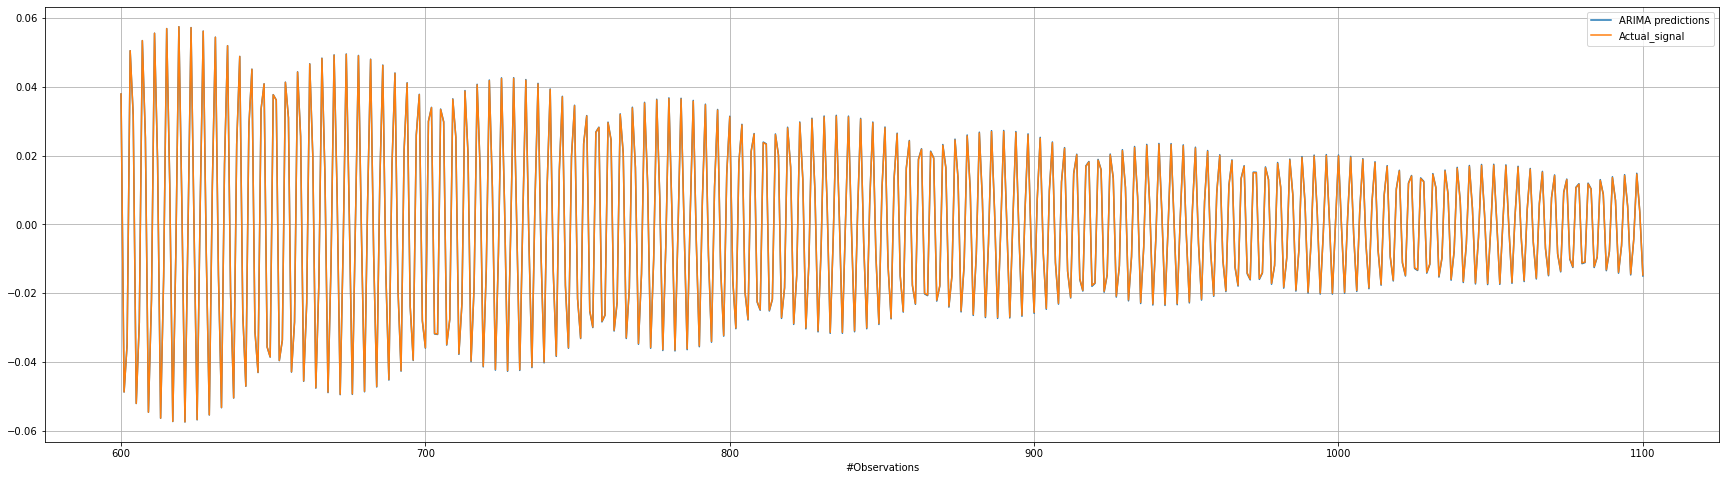

In [122]:
data1_01 = pd.read_csv('pred01df.csv',sep=',',parse_dates=False)
data2_01 = pd.read_csv('test01df.csv',sep=',',parse_dates=False)
data1_01['Actual_signal'] = data2_01['Signal']


#print(pred.head(), test_df.head())

#data1.plot(legend=True)
#data1.plot(x='ARIMA predictions', y='Actual_Frequency')


data1_01 = data1_01.rename(columns={"Unnamed: 0":"#Observations"})
mylist=list(data1_01)
print(mylist)
data1_01.to_csv('output01df.csv')
data1_01.plot(x='#Observations', y=['ARIMA predictions', 'Actual_signal'], figsize=(30,8), grid=True)

In [61]:
#To create sample data with 3 poles

In [124]:
stepwise_fit = auto_arima(df01['Signal'], trace = True,suppress_warnings=True)           

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.67 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=966.270, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=961.089, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=964.284, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1203.002, Time=0.73 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1201.112, Time=0.92 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.60 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.98 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.92 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-1205.002, Time=0.27 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=959.101, Time=0.07 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-1203.111, Time=0.36 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=1.12 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.88 sec
 A

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1500
Model:               SARIMAX(2, 0, 0)   Log Likelihood                 605.501
Date:                Mon, 15 Nov 2021   AIC                          -1205.002
Time:                        22:09:15   BIC                          -1189.062
Sample:                             0   HQIC                         -1199.063
                               - 1500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1310      0.007     19.777      0.000       0.118       0.144
ar.L2         -0.8947      0.003   -310.673      0.000      -0.900      -0.889
sigma2         0.0261      0.000     86.718      0.000       0.025       0.027
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             21244.98
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
train_df01=pd.read_csv('/Users/shravankumarakula/Documents/pythonWorkspace/Time Signals/syntheticData/df.csv',parse_dates=['Timestamp'], skiprows=range(1,400), nrows=600)

test_df01=pd.read_csv('/Users/shravankumarakula/Documents/pythonWorkspace/Time Signals/syntheticData/df.csv',parse_dates=['Timestamp'], skiprows=range(1,1000))


print('Shape of data',test_df01.shape)


train_df01.to_csv('train01df.csv')
test_df01.to_csv('test01df.csv')

Shape of data (501, 3)


In [126]:
stepwise_fit = auto_arima(train_df01['Signal'], trace = True,suppress_warnings=True)           

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.00 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-681.775, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-680.821, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-683.774, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 2.340 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                        SARIMAX   Log Likelihood                 342.887
Date:                Mon, 15 Nov 2021   AIC                           -683.774
Time:                        22:09:51   BIC                           -679.377
Sample:                             0   HQIC                          -682.062
                                - 600                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0187      0.001     20.456      0.000       0.017       0.020
===================================================================================
Ljung-Box (L1) (Q):                   1.05   Jarque-Bera (JB):                15.59
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               0.09   Skew:                             0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [76]:
stepwise_fit = auto_arima(df01['Signal'], start_p=0, start_q=0,max_d = 2,
                          max_p=5, max_q=5,m=12,start_P=0,start_Q=0,
                          max_P = 2, max_Q = 2,
                          seasonal=True,
                          d=1,D=1,trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1573.050, Time=0.11 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1529.871, Time=0.41 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.30 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1527.874, Time=0.19 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=3.42 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=3.35 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=39.115, Time=0.39 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=-109.751, Time=0.81 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=inf, Time=8.00 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=6.18 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=inf, Time=5.89 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=13.61 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=-248.372, Time=1.97 sec
 ARIMA(3,1,0)(0,1,0)[12]             : AIC=-35.253, Time=0.61 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=inf, Time=7.3

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1500
Model:             SARIMAX(4, 1, 1)x(2, 1, [], 12)   Log Likelihood                4505.247
Date:                             Mon, 15 Nov 2021   AIC                          -8992.493
Time:                                     21:53:31   BIC                          -8944.753
Sample:                                          0   HQIC                         -8974.700
                                            - 1500                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.947e-05      0.001      0.079      0.937      -0.001       0.001
ar.L1         -0.1047      0.000   -225.371      0.000      -0.106      -0.104
ar.L2         -1.3939      0.000  -3865.868      0.000      -1.395      -1.393
ar.L3         -0.1087      0.000   -241.165      0.000      -0.110      -0.108
ar.L4         -0.9944      0.000  -9173.988      0.000      -0.995      -0.994
ma.L1          0.9377      0.003    355.623      0.000       0.933       0.943
ar.S.L12       1.9271      0.003    755.669      0.000       1.922       1.932
ar.S.L24      -0.9541      0.002   -633.404      0.000      -0.957      -0.951
sigma2         0.0001   2.05e-06     61.163      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   8.85   Jarque-Bera (JB):             42261.23
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                             1.07
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train_df01['Signal'],order=(4,0,1))
model=model.fit()
model.summary()

#ARIMA predicted as (2,0,0) without pqd and (4,1,1) with pqd but when tried with (4,0,0) I got correct predictions

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Signal   No. Observations:                  600
Model:                 ARIMA(4, 1, 1)   Log Likelihood                2998.155
Date:                Tue, 16 Nov 2021   AIC                          -5984.311
Time:                        11:09:43   BIC                          -5957.939
Sample:                             0   HQIC                         -5974.044
                                - 600                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6602      0.001    447.718      0.000       0.657       0.663
ar.L2         -1.9405      0.001  -1638.499      0.000      -1.943      -1.938
ar.L3          0.6590      0.001    455.388      0.000       0.656       0.662
ar.L4         -0.9830      0.001   -879.454      0.000      -0.985      -0.981
ma.L1          0.9931      0.112      8.868      0.000       0.774       1.213
sigma2      2.405e-06   2.64e-07      9.112      0.000    1.89e-06    2.92e-06
===================================================================================
Ljung-Box (L1) (Q):                  91.06   Jarque-Bera (JB):            119667.60
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                            -4.46
Prob(H) (two-sided):                  0.00   Kurtosis:                        71.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

600 1100


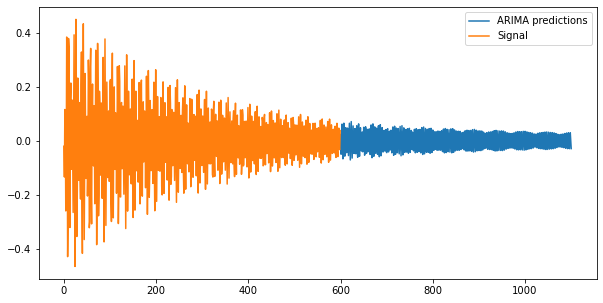

In [12]:
start=len(train_df01)
end=len(train_df01)+len(test_df01)-1
print(start, end)


pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')

pred.plot(legend=True, figsize=(12,8))
#test['Frequency'].plot(legend=True)
train_df01['Signal'].plot(legend=True, figsize=(10,5))





pred.to_csv('pred01df.csv')

['#Observations', 'ARIMA predictions', 'Actual_signal']


<AxesSubplot:xlabel='#Observations'>

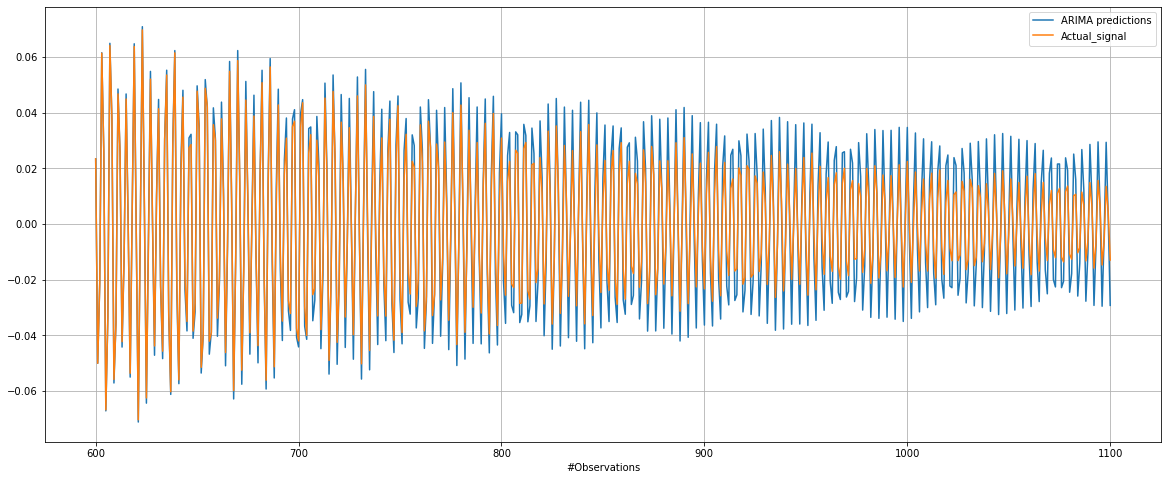

In [13]:
data1_01 = pd.read_csv('pred01df.csv',sep=',',parse_dates=False)
data2_01 = pd.read_csv('test01df.csv',sep=',',parse_dates=False)
data1_01['Actual_signal'] = data2_01['Signal']


#print(pred.head(), test_df.head())

#data1.plot(legend=True)
#data1.plot(x='ARIMA predictions', y='Actual_Frequency')


data1_01 = data1_01.rename(columns={"Unnamed: 0":"#Observations"})
mylist=list(data1_01)
print(mylist)
data1_01.to_csv('output01df.csv')
data1_01.plot(x='#Observations', y=['ARIMA predictions', 'Actual_signal'], figsize=(20,8), grid=True)

In [ ]:
#To create sample data with 4 poles

In [131]:
stepwise_fit = auto_arima(df01['Signal'], trace = True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.99 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1322.519, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1262.261, Time=0.22 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1320.554, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2.628, Time=0.36 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-114.139, Time=0.58 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-1162.543, Time=0.97 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-1170.138, Time=1.38 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.16 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.96 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=-1172.137, Time=0.51 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=-1164.543, Time=0.38 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=1.59 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=1.31

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1500
Model:               SARIMAX(5, 0, 0)   Log Likelihood                 592.069
Date:                Mon, 15 Nov 2021   AIC                          -1172.137
Time:                        22:11:49   BIC                          -1140.258
Sample:                             0   HQIC                         -1160.261
                               - 1500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8227      0.011     73.433      0.000       0.801       0.845
ar.L2         -1.5697      0.009   -166.904      0.000      -1.588      -1.551
ar.L3          0.8215      0.015     54.104      0.000       0.792       0.851
ar.L4         -0.8058      0.008    -95.241      0.000      -0.822      -0.789
ar.L5          0.0836      0.009      9.204      0.000       0.066       0.101
sigma2         0.0265      0.000     98.398      0.000       0.026       0.027
===================================================================================
Ljung-Box (L1) (Q):                   1.87   Jarque-Bera (JB):             50586.07
Prob(Q):                              0.17   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        31.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [6]:
stepwise_fit = auto_arima(df01['Signal'],d=1, trace = True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2023.986, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2023.417, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.90 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2021.986, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.85 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 4.214 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1500
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1009.993
Date:                Mon, 15 Nov 2021   AIC                           2021.986
Time:                        19:40:21   BIC                           2027.299
Sample:                             0   HQIC                          2023.965
                               - 1500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.2253      0.002     91.051      0.000       0.220       0.230
===================================================================================
Ljung-Box (L1) (Q):                   2.48   Jarque-Bera (JB):             25480.93
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                             0.87
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
#stepwise_fit = auto_arima(df01['Signal'], d=1, trace = True,suppress_warnings=True, stepwise = False)
stepwise_fit = auto_arima(df01['Signal'], start_p=0, start_q=0,max_d = 2,
                          max_p=5, max_q=5,m=12,start_P=0,start_Q=0,
                          max_P = 2, max_Q = 2,
                          seasonal=True,
                          d=1,D=1,trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2091.542, Time=0.19 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1867.068, Time=0.47 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.20 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1928.977, Time=0.47 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1692.331, Time=1.17 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=1691.061, Time=1.58 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=3.03 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=inf, Time=13.65 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=1753.823, Time=2.72 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=1761.682, Time=1.77 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=649.128, Time=6.51 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=677.421, Time=2.12 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=828.655, Time=2.73 sec
 ARIMA(2,1,0)(2,1,2)[12]             : AIC=inf, Time=19.09 sec
 ARIMA(2,1,0)(1,1,0)[12]             : A

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1500
Model:             SARIMAX(5, 1, 1)x(2, 1, 1, 12)   Log Likelihood                1856.494
Date:                            Mon, 15 Nov 2021   AIC                          -3692.987
Time:                                    20:00:46   BIC                          -3639.942
Sample:                                         0   HQIC                         -3673.217
                                           - 1500                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3914      0.014     28.966      0.000       0.365       0.418
ar.L2         -1.3528      0.002   -569.542      0.000      -1.357      -1.348
ar.L3          0.5926      0.019     31.388      0.000       0.556       0.630
ar.L4         -0.9480      0.002   -521.831      0.000      -0.952      -0.944
ar.L5          0.4800      0.014     35.529      0.000       0.453       0.506
ma.L1          0.9692      0.022     44.320      0.000       0.926       1.012
ar.S.L12      -0.0642      0.006     -9.918      0.000      -0.077      -0.051
ar.S.L24       0.9257      0.006    142.579      0.000       0.913       0.938
ma.S.L12      -0.1167      0.023     -5.171      0.000      -0.161      -0.072
sigma2         0.0045      0.000     39.043      0.000       0.004       0.005
===================================================================================
Ljung-Box (L1) (Q):                 148.01   Jarque-Bera (JB):              6416.93
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                            -0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [204]:
stepwise_fit = auto_arima(train_df01['Signal'], trace = True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-654.040, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-655.052, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-656.039, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 2.629 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                        SARIMAX   Log Likelihood                 329.019
Date:                Mon, 15 Nov 2021   AIC                           -656.039
Time:                        22:30:00   BIC                           -651.642
Sample:                             0   HQIC                          -654.327
                                - 600                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0196      0.001     23.036      0.000       0.018       0.021
===================================================================================
Ljung-Box (L1) (Q):                   3.02   Jarque-Bera (JB):                59.11
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               0.09   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [144]:
stepwise_fit = auto_arima(train_df01['Signal'], start_p=0, start_q=0,max_d = 2,
                          max_p=5, max_q=5,m=12,start_P=0,start_Q=0,
                          max_P = 2, max_Q = 2,
                          seasonal=True,
                          d=1,D=1,trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-754.449, Time=0.14 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-809.905, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.53 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-811.533, Time=0.22 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=-810.347, Time=0.22 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=-808.467, Time=1.03 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=-1766.698, Time=0.44 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=-1864.327, Time=1.32 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=inf, Time=3.62 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=-1940.729, Time=1.86 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=-1777.950, Time=0.30 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=-2441.664, Time=4.96 sec
 ARIMA(2,1,0)(2,1,2)[12]             : AIC=inf, Time=17.24 sec
 ARIMA(2,1,0)(1,1,2)[12]             : AIC=inf, Time=10.42 sec
 ARIMA(1,1,0)(2,1,1)[12]        

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  600
Model:             SARIMAX(4, 1, 1)x(2, 1, 1, 12)   Log Likelihood                2026.739
Date:                            Mon, 15 Nov 2021   AIC                          -4035.479
Time:                                    22:18:51   BIC                          -3996.104
Sample:                                         0   HQIC                         -4020.136
                                            - 600                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6440      0.009     74.695      0.000       0.627       0.661
ar.L2         -1.8492      0.015   -123.658      0.000      -1.879      -1.820
ar.L3          0.6337      0.011     59.389      0.000       0.613       0.655
ar.L4         -0.8771      0.014    -63.351      0.000      -0.904      -0.850
ma.L1          0.9865      0.171      5.768      0.000       0.651       1.322
ar.S.L12      -0.2863      0.187     -1.534      0.125      -0.652       0.079
ar.S.L24       0.5925      0.177      3.339      0.001       0.245       0.940
ma.S.L12      -0.8143      0.182     -4.478      0.000      -1.171      -0.458
sigma2      5.495e-05   5.49e-06     10.012      0.000    4.42e-05    6.57e-05
===================================================================================
Ljung-Box (L1) (Q):                  74.48   Jarque-Bera (JB):              2281.45
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.02   Skew:                            -0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [145]:
train_df01=pd.read_csv('/Users/shravankumarakula/Documents/pythonWorkspace/Time Signals/syntheticData/df.csv',parse_dates=['Timestamp'], skiprows=range(1,400), nrows=600)

test_df01=pd.read_csv('/Users/shravankumarakula/Documents/pythonWorkspace/Time Signals/syntheticData/df.csv',parse_dates=['Timestamp'], skiprows=range(1,1000))


print('Shape of data',test_df01.shape)


train_df01.to_csv('train01df.csv')
test_df01.to_csv('test01df.csv')

Shape of data (501, 3)


In [345]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train_df01['Signal'],order=(5,1,4))
model=model.fit()
model.summary()
#Model predicted to be (5,0,0) without pdq but (5,1,1) with pqd on full data
#On train data (0,0,0) without pdq and (4,1,1) with pqd
#but (5,1,1) and (0,0,0) are false. With (5,0,0 ), (5,1,0), (4,1,3), (5,1,4) we get little variations. 
#With (5,1,1), (5,1,2), (5,0,2) lot of variations.
#(5,1,4) is more appropriate than (4,1,3), (5,0,0), (5,1,0) and (4,1,3)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Signal   No. Observations:                  600
Model:                 ARIMA(5, 1, 4)   Log Likelihood                2567.265
Date:                Mon, 15 Nov 2021   AIC                          -5114.530
Time:                        22:48:43   BIC                          -5070.578
Sample:                             0   HQIC                         -5097.419
                                - 600                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4601      0.025     59.088      0.000       1.412       1.508
ar.L2         -2.4301      0.021   -114.719      0.000      -2.472      -2.389
ar.L3          2.0826      0.047     44.318      0.000       1.991       2.175
ar.L4         -1.4760      0.021    -69.718      0.000      -1.518      -1.435
ar.L5          0.6571      0.024     27.239      0.000       0.610       0.704
ma.L1          1.9133      0.083     23.168      0.000       1.751       2.075
ma.L2         -0.0275      0.079     -0.349      0.727      -0.182       0.127
ma.L3         -1.9134      0.081    -23.697      0.000      -2.072      -1.755
ma.L4         -0.9721      0.083    -11.653      0.000      -1.136      -0.809
sigma2      1.023e-05   8.74e-07     11.701      0.000    8.51e-06    1.19e-05
===================================================================================
Ljung-Box (L1) (Q):                 112.33   Jarque-Bera (JB):               644.21
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.01   Skew:                            -0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.76e+17. Standard errors may be unstable.
"""

600 1100


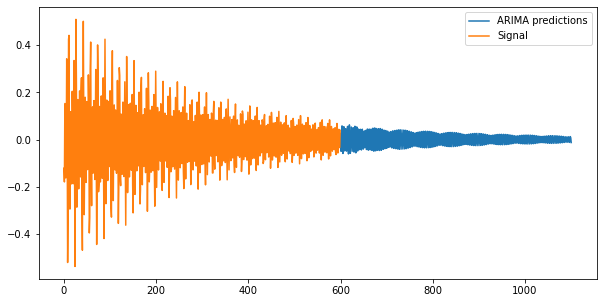

In [346]:
start=len(train_df01)
end=len(train_df01)+len(test_df01)-1
print(start, end)


pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')

pred.plot(legend=True, figsize=(12,8))
#test['Frequency'].plot(legend=True)
train_df01['Signal'].plot(legend=True, figsize=(10,5))





pred.to_csv('pred01df.csv')

['#Observations', 'ARIMA predictions', 'Actual_signal']


<AxesSubplot:xlabel='#Observations'>

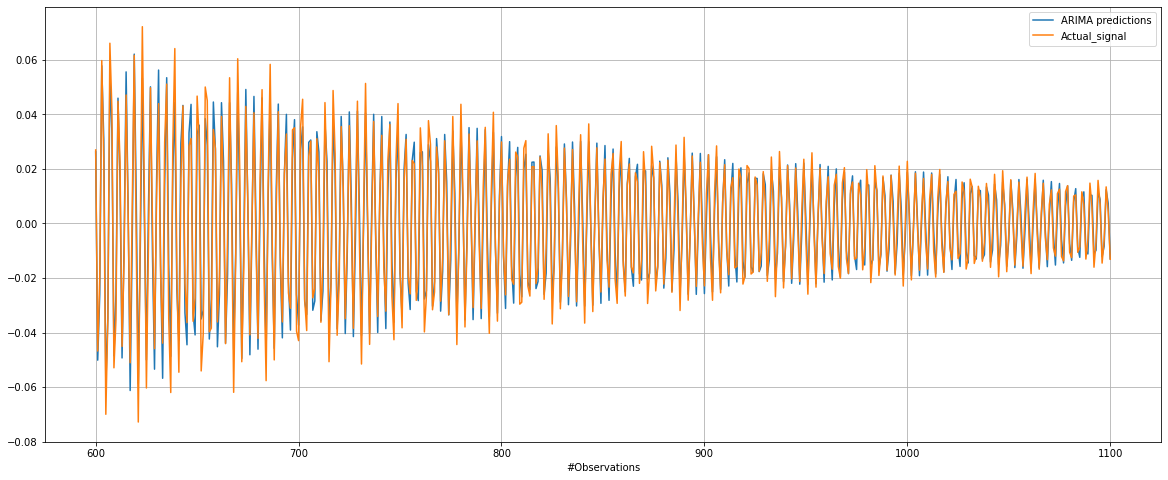

In [347]:
data1_01 = pd.read_csv('pred01df.csv',sep=',',parse_dates=False)
data2_01 = pd.read_csv('test01df.csv',sep=',',parse_dates=False)
data1_01['Actual_signal'] = data2_01['Signal']


#print(pred.head(), test_df.head())

#data1.plot(legend=True)
#data1.plot(x='ARIMA predictions', y='Actual_Frequency')


data1_01 = data1_01.rename(columns={"Unnamed: 0":"#Observations"})
mylist=list(data1_01)
print(mylist)
data1_01.to_csv('output01df.csv')
data1_01.plot(x='#Observations', y=['ARIMA predictions', 'Actual_signal'], figsize=(20,8), grid=True)

In [296]:
1/2*np.pi

1.5707963267948966

In [33]:
1/1.5707963267948966

0.6366197723675814